# Minimum Spanning Tree Algorithms

In [1]:
#Python version
!python --version #This assignment use the version of 3.6.0

Python 3.6.0 :: Anaconda 4.3.1 (64-bit)


### Import library

In [2]:
%matplotlib notebook
import numpy as np   #used to generate random points and calculate Euclidean distance
import matplotlib.pyplot as plt   #plotting
import matplotlib.animation as animation  #plotting & making animation

### 1:

In [3]:
#ADT class for a point
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None
        self.depth = 0
    
    #calculate distance between 2 points using Euclidean distance method
    def dist(self, p2):
        return np.sqrt((self.x - p2.x)**2 + (self.y - p2.y)**2)
    
    #get x-axis
    def getX(self):
        return self.x
    
    #get y-axis
    def getY(self):
        return self.y
    
    def __str__(self):
        return '({},{})'.format(self.x,self.y)

#implement a function to generate a test set of n random nodes
def gen_random_points(n):
    #generate random points between 0-1 (can change by user)
    points = np.random.rand(n,2)
    #generate random nodes set
    ans = []
    for p in points:
        ans.append(Point(p[0],p[1]))
    return ans

### 2 & 4

In [4]:
#generate partition
class Partition():
    
    def __init__(self, points):
        self.set = points
        self.count = len(points)
    
    #generate a new set within the partition
    def make_set(self):
        for i in range(len(self.set)):
            self.set[i].parent = i
            self.set[i].depth = 0            
    
    # A utility function to find set of an element p
    def find(self, p):
        root = p
        '''
        Question 4: Extend with path compression
        '''
        while(root != self.set[root].parent):
            root = self.set[root].parent
        while(p != root):
            newp = self.set[p].parent
            self.set[p].parent = root
            p = newp
        return root
    
    # A function that does union of two sets of p and q   
    def union(self, p, q):
        rootp = self.find(p)
        rootq = self.find(q)
        # If roots are not same, then make p as a parent
        if(rootp == rootq):
            return
        self.set[rootp].parent = rootq
        self.count -= 1
        
    '''
    Question 6: checking whter 2 points belong to the same cluster
    '''
    #finding if they have the same parent
    def connected(self, p, q):
        return self.find(p) == self.find(q)
    
    #return number of points
    def cluster(self):
        return self.count
    
    #print object
    def __str__(self):
        string=""
        for each in self.set:
            string+=str(each)+"\n"
        return string

### 3

In [5]:
#using Kruskal method to test two classes
def Kruskal(points):
    #get all edges for each pair of points
    edges = []
    for i in range(len(points)):
        for j in range(i+1,len(points)):
            edges.append((points[i].dist(points[j]), i, j))
    return edges

In [6]:
#user can define how many random points they need
n = 50
#call gengerate rondom point function
points = gen_random_points(n)
#call partition function
uf = Partition(points)
uf.make_set()
#call Kruskal function above
edges=Kruskal(points)
#print(edges)

### 5

In [7]:
#finding k-cluster
def k_clustering(uf, edges, k):
    #sorted distance for each nodes in non-decreasing 
    edges = sorted(edges, key = lambda x: x[0])
    i = 0
    #Pick the smallest edge and increment the index for next iteration
    while(uf.cluster() > k):
        p = edges[i][1]
        q = edges[i][2]
        # If including this edge does't cause cycle, include it in result and increment the index of result for next edge
        if(not uf.connected(p, q)):
            uf.union(p, q)
        i += 1
        # Else discard the edge

### 6

In [8]:
def CompareTwoPoints(uf, p1, p2):
    return (uf.find(p1) == uf.find(p2))  #which is equivalent to 'connected' function in Patition class

### 7

In [9]:
def dunn_index(points, uf, n):
    within_cluster = 0
    inter_cluster = 20
    for i in range(n):
        for j in range(i+1, n):
            #if two points are in the same cluster:
            if(uf.connected(i, j)):
                #find the maximum distance of two elements in any cluster (in cluster)
                within_cluster = max(within_cluster, points[i].dist(points[j]))
            #if two points are not in the same cluster
            else:
                #find the shortest distance of two elements (intercluster)
                inter_cluster = min(inter_cluster, points[i].dist(points[j]))
    return inter_cluster/within_cluster

##### Testing
The larger the dunn index, the greater the distance between clusters and the smaller the distance inside clusters

In [10]:
k_clustering(uf, edges, 20)
dunn_index(points, uf, n)

0.22476799073077089

The sets of edges that are in the mcst but not in the forest of the k-clustering is the largest k-1 edges in the mcst.

### 9

<IPython.core.display.Javascript object>


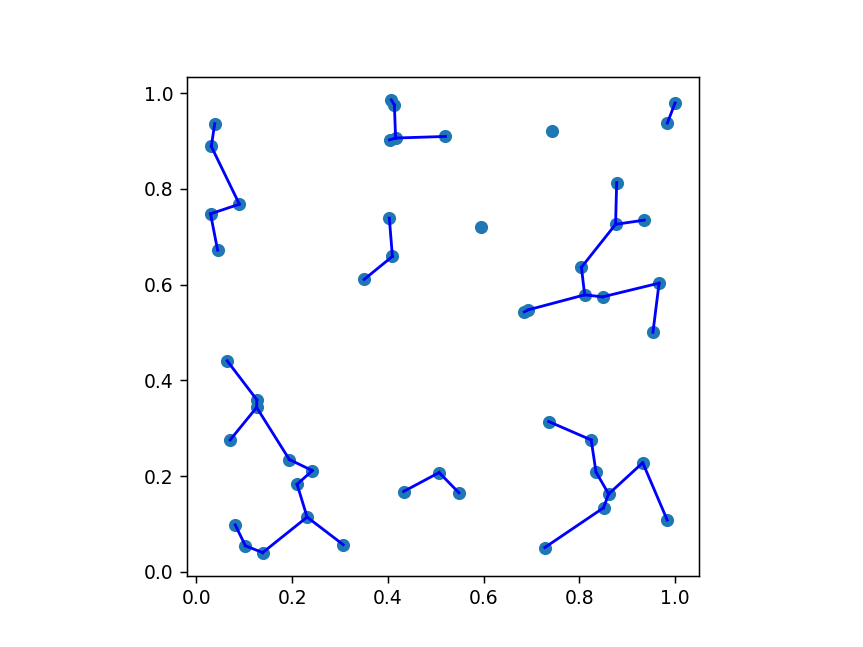

In [11]:
points = None
n = 50    #user can change the number of points
k = 10    #user can change the number of cluster here
fig = plt.figure()
if points == None:
    points = gen_random_points(n)
uf = Partition(points)
uf.make_set()
edges = []
patches = []
#repeat algorithms
for i in range(len(points)):
    for j in range(i+1,len(points)):
        edges.append((points[i].dist(points[j]), i, j))
for i in range(len(points)):
    for j in range(len(points)):
        line, = plt.plot([],[], color='blue')
        patches.append(line)
#redo clustering
edges = sorted(edges, key = lambda x: x[0])
x = [p.x for p in points]
y = [p.y for p in points]
ax = plt.axes()
ax.set_aspect('equal')
ax.scatter(x, y)

#making minimum spanning tree
def min_spanning_tree(i):
    global n, k, uf, edges, points
    if(uf.cluster() > k):
        p = edges[i][1]
        q = edges[i][2]
        if(not uf.connected(p, q)):
            uf.union(p, q)
            #line.set_data(np.append(line.get_xdata(), [points[p].x, points[q].x]), np.append(line.get_ydata(), [points[p].y, points[q].y]))
            patches[n*p + q].set_data([points[p].x, points[q].x], [points[p].y, points[q].y])
    return patches
#plotting by animation
ani = animation.FuncAnimation(fig, min_spanning_tree, frames = len(edges), blit=True)
plt.draw()
plt.show()